# Indian Premier League (IPL) - 2022 Analysis using Python

This is my first proper exploratory data analysis project with python. I have used the dataset from Kaggle, link for the dataset is given below.

Dataset - https://www.kaggle.com/datasets/aravindas01/ipl-2022dataset

Now the first step is to import all the required python libraries and the respective dataset as well.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
dataf = pd.read_csv("ipl22.csv")
dataf.head(8)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131.0,5.0,133.0,4.0,Kolkata,Wickets,6.0,Umesh Yadav,MS Dhoni,50.0,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177.0,5.0,179.0,6.0,Delhi,Wickets,4.0,Kuldeep Yadav,Ishan Kishan,81.0,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205.0,2.0,208.0,5.0,Punjab,Wickets,5.0,Odean Smith,Faf du Plessis,88.0,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158.0,6.0,161.0,5.0,Gujarat,Wickets,5.0,Mohammed Shami,Deepak Hooda,55.0,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210.0,6.0,149.0,7.0,Rajasthan,Runs,61.0,Sanju Samson,Aiden Markram,57.0,Yuzvendra Chahal,3--22
5,6,"March 30,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Kolkata,Group,Banglore,Field,128.0,10.0,132.0,7.0,Banglore,Wickets,3.0,Wanindu Hasaranga,Sherfane Rutherford,28.0,Wanindu Hasaranga,4--20
6,7,"March 31,2022","Brabourne Stadium, Mumbai",Chennai,Lucknow,Group,Lucknow,Field,210.0,7.0,211.0,4.0,Lucknow,Wickets,6.0,Evin Lewis,Quinton de Kock,61.0,Ravi Bishnoi,2--24
7,8,"April 1,2022","Wankhede Stadium, Mumbai",Kolkata,Punjab,Group,Kolkata,Field,137.0,10.0,141.0,4.0,Kolkata,Wickets,6.0,Umesh Yadav,Andre Russell,70.0,Umesh Yadav,4--23


Now checking the datatypes of each column in the dataframe to know numerical columns and string columns, because sometime even numerical data will be in string datatype format.

In [5]:
dataf.dtypes

match_id                 int64
date                    object
venue                   object
team1                   object
team2                   object
stage                   object
toss_winner             object
toss_decision           object
first_ings_score       float64
first_ings_wkts        float64
second_ings_score      float64
second_ings_wkts       float64
match_winner            object
won_by                  object
margin                 float64
player_of_the_match     object
top_scorer              object
highscore              float64
best_bowling            object
best_bowling_figure     object
dtype: object

Now that we have seen the datatypes we have to know the total matches that has taken place.

In [9]:
len(dataf)

70

A total of 70 matches have been played in IPL 2022. The dataset contains all the information we need to start. Let us start by looking at the number of matches won by each team

Text(0.5, 1.0, 'Matches won by each Team')

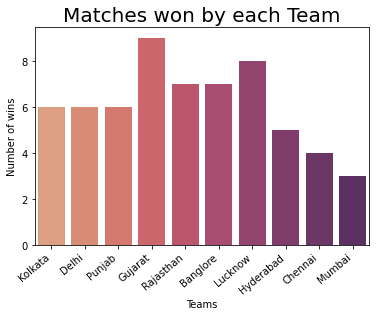

In [12]:
ax=sns.countplot(data=dataf,x="match_winner",palette='flare')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.xlabel('Teams')
plt.ylabel('Number of wins')
plt.title('Matches won by each Team',fontdict = {'fontsize' : 20})

So, currently, Gujarat is leading the tournament by winning eight matches. It is an achievement as a new team for Gujarat in IPL.
Now lets see hoew most of the teams win. Here we will analyze whether most of the teams win by batting first (defending) or batting second (chasing).

In [28]:
dataf['won_by']=dataf['won_by'].map({'Wickets':'Chasing','Runs':'Defending'})
dataf.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131.0,5.0,133.0,4.0,Kolkata,NaN,6.0,Umesh Yadav,MS Dhoni,50.0,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177.0,5.0,179.0,6.0,Delhi,NaN,4.0,Kuldeep Yadav,Ishan Kishan,81.0,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205.0,2.0,208.0,5.0,Punjab,NaN,5.0,Odean Smith,Faf du Plessis,88.0,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158.0,6.0,161.0,5.0,Gujarat,NaN,5.0,Mohammed Shami,Deepak Hooda,55.0,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210.0,6.0,149.0,7.0,Rajasthan,NaN,61.0,Sanju Samson,Aiden Markram,57.0,Yuzvendra Chahal,3--22


In [17]:
win=dataf['won_by'].value_counts()
values=win.values
index=win.index
print(values,index)

[32 29] Index(['Defending', 'Chasing'], dtype='object')


Text(0.5, 1.0, 'Matches won by Chasing or Defending')

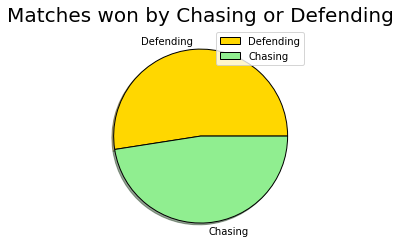

In [19]:
pie_colors=['gold','lightgreen']
plt.pie(values,labels=index,colors=pie_colors,shadow=True,wedgeprops={'edgecolor':'black'})
plt.legend(loc=0)
plt.title('Matches won by Chasing or Defending',fontdict = {'fontsize' : 20})

So, currently a little more than half of the matches are won while defending the target. Since the difference is very less we can conclude any one as the better option.
Now let's see what most teams prefer after winning the toss.

In [23]:
dataf['toss_decision'].unique()

array(['Field', 'Bat', nan], dtype=object)

In [25]:
decision=dataf['toss_decision'].value_counts()
d_index=decision.index
d_values=decision.values
print(d_index,d_values)

Index(['Field', 'Bat'], dtype='object') [53  8]


Text(0.5, 1.0, 'Toss Decision')

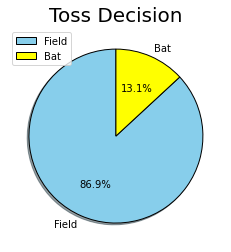

In [29]:
pie_color=['skyblue','yellow']
plt.pie(d_values,labels=d_index,colors=pie_color,shadow=True,
        wedgeprops={'edgecolor':'black'},startangle=90,autopct='%1.1f%%')
plt.legend(loc=2)
plt.title('Toss Decision',fontdict = {'fontsize' : 20})

Thus, most captains choose to field after winning the toss. So far, around 87% of the times captains have chosen to field first, and only about 13% of the times the decision has gone towards batting first.
Now lets see the top scorer of the IPL 2022 matches.

In [32]:
tscore=dataf["top_scorer"].value_counts()
print(tscore.index)
print(tscore.values)

Index(['Jos Buttler', 'KL Rahul', 'Quinton de Kock', 'Faf du Plessis',
       'Shubman Gill', 'Liam Livingstone', 'David Warner', 'Abhishek Sharma',
       'W. Saha', 'Hardik Pandya', 'Shikhar Dhawan', 'Ishan Kishan',
       'MS Dhoni', 'Andre Russell', 'Devon Conway', 'Sanju Samson',
       'Ruturaj Gaikwad', 'Tilak Varma', 'Virat Kohli', 'Nitish Rana',
       'Sai Sudharsan', 'Yashasvi Jaiswal', 'Riyan Parag', 'Kane Williamson',
       'David Miller', 'Dinesh Karthik', 'Rahul Tripathi', 'Shivam Dube',
       'Shimron Hetmyer', 'Suryakumar Yadav', 'Pat Cummins',
       'Sherfane Rutherford', 'Aiden Markram', 'Deepak Hooda',
       'Mitchell Marsh'],
      dtype='object')
[5 4 4 3 3 3 3 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Text(0.5, 1.0, 'High Scoring Batsmen')

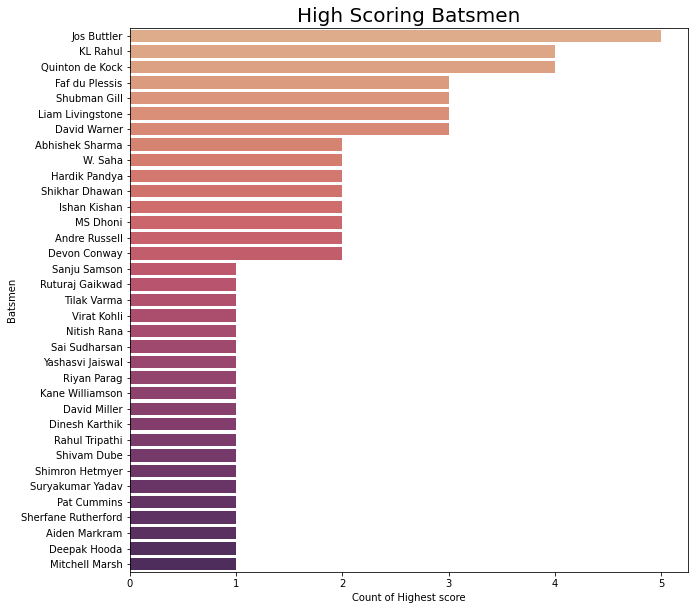

In [35]:
plt.figure(figsize=(10, 10))
plt.ylabel("Batsmen")
plt.xlabel("Count of Highest score")
sns.barplot(y=tscore.index,x=tscore.values,palette="flare")
plt.title('High Scoring Batsmen',fontdict = {'fontsize' : 20})

Currently, Jos Butler is leading by scoring the highest score in 5 matches. He is looking in great touch. Let's analyze it deeply by including the runs scored by top scorers. 

In [41]:
figure=px.bar(data_frame=dataf,x='top_scorer',y='highscore',color='highscore',title='Top Scorer - IPL 2022')
figure.show()

So, till now, Jos Butler has scored three centuries, and KL Rahul has scored two centuries. Now, lets have a look at the most player of the match awards till now in IPL 2022.

<AxesSubplot:title={'center':'Most Player of the Match Awards'}, xlabel='Player of the match Count', ylabel='Batsmen'>

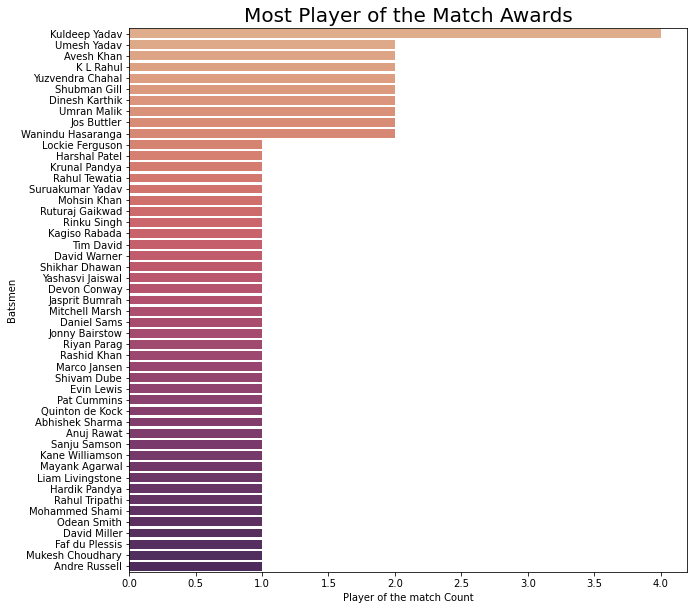

In [43]:
pom=dataf["player_of_the_match"].value_counts()
plt.figure(figsize=(10, 10))
plt.ylabel("Players")
plt.xlabel("Player of the match Count")
plt.title('Most Player of the Match Awards',fontdict = {'fontsize' : 20})
sns.barplot(y=pom.index,x=pom.values,palette="flare")

So Kuldeep Yadav is leading in the list of players of the match awards with four matches. It is a great tournament for Kuldeep Yadav this year. Now let’s have a look at the bowlers with the best bowling figures in most of the matches.

<AxesSubplot:title={'center':'Best Bowlers - IPL 2022'}, xlabel='Best Bowling', ylabel='Bowlers'>

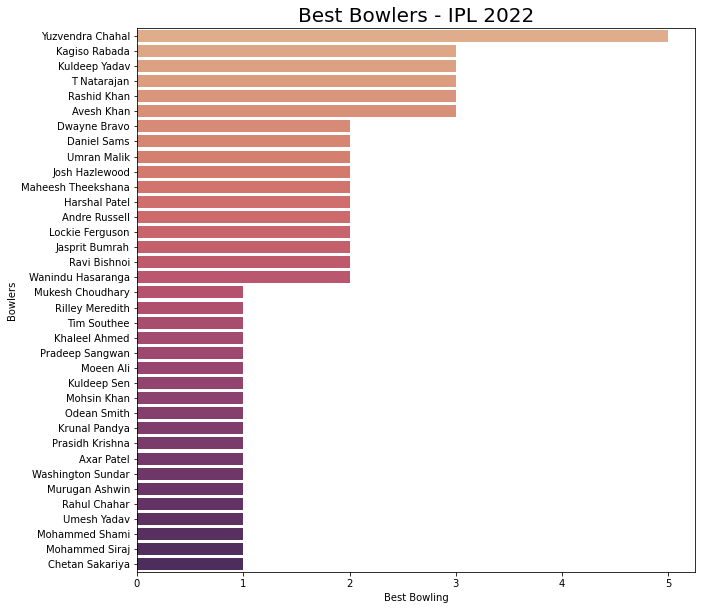

In [45]:
bb=dataf["best_bowling"].value_counts()
plt.figure(figsize=(10, 10))
plt.ylabel("Bowlers")
plt.xlabel("Best Bowling")
plt.title('Best Bowlers - IPL 2022',fontdict = {'fontsize' : 20})
sns.barplot(y=bb.index,x=bb.values,palette="flare")

You can see Yuzvendra Chahal having the best bowling figures in four matches. So this is a great tournament for Yuzvendra Chahal this year too.

Now let’s have a look at whether most of the wickets fall while setting the target or while chasing the target.

In [47]:
figure = go.Figure()
figure.add_trace(go.Bar(
    x=dataf["venue"],
    y=dataf["first_ings_wkts"],
    name='First Innings Wickets',
    marker_color='gold'
))
figure.add_trace(go.Bar(
    x=dataf["venue"],
    y=dataf["second_ings_wkts"],
    name='Second Innings Wickets',
    marker_color='lightgreen'
))
figure.update_layout(barmode='group', xaxis_tickangle=45)
figure.show()

So in the Wankhede Stadium, Mumbai and MCA Stadium, Pune, most wickets have fallen while chasing the target. But, in Brabourne Stadium, Mumbai and Dr DY Patil Sports Academy, Mumbai it has been proven otherwise.

## Summary

This simple data analysis using python has given a overview of the happenings in IPL 2022. IPL 2022 is going great for Gujrat as a new team this year. Jos Buttler and KL Rahul have been great with the bat, and Yuzvendra Chahal and Kuldeep Yadav have been great with the ball.